In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8951048951048951

In [5]:
bag_knn = BaggingClassifier(knn,n_estimators = 9,max_samples=0.7,bootstrap=True,random_state = 3,oob_score = True)

In [6]:
bag_knn

BaggingClassifier(estimator=KNeighborsClassifier(), max_samples=0.7,
                  n_estimators=9, oob_score=True, random_state=3)

In [9]:
bag_knn.fit(X_train,y_train)
bag_knn.score(X_test,y_test)

0.9020979020979021

# RandomForests

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns 


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
df.shape

(69301, 13)

In [4]:
df.drop(columns='id',inplace=True)

In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
          #observations
#no missing values
#assuming age is number of days
#outliers in height
#outliers in ap_high
#outlaiers in ap_low
#seems cholestrol and glucose are binary
#we see the further analysis

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(69277, 12)

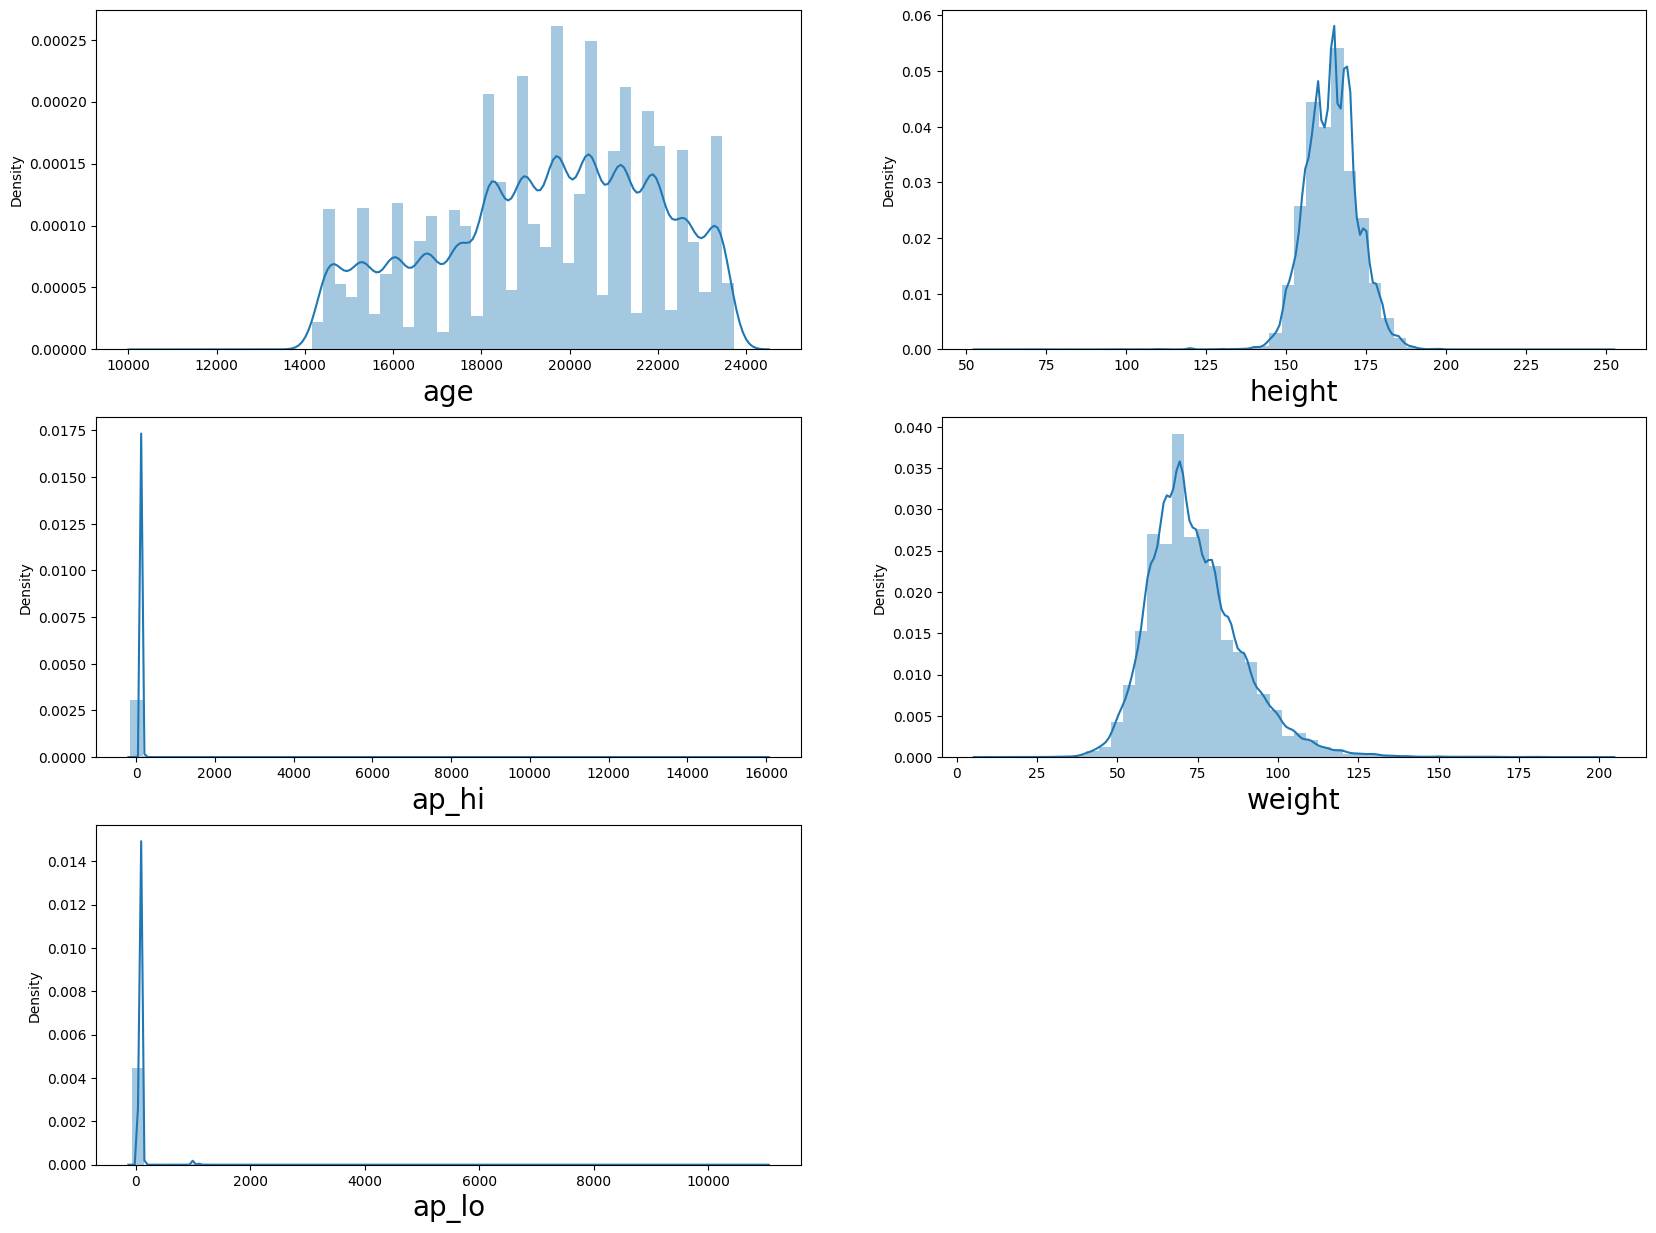

In [9]:
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber <= 6 :
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [10]:
from scipy.stats import zscore
z_score = zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


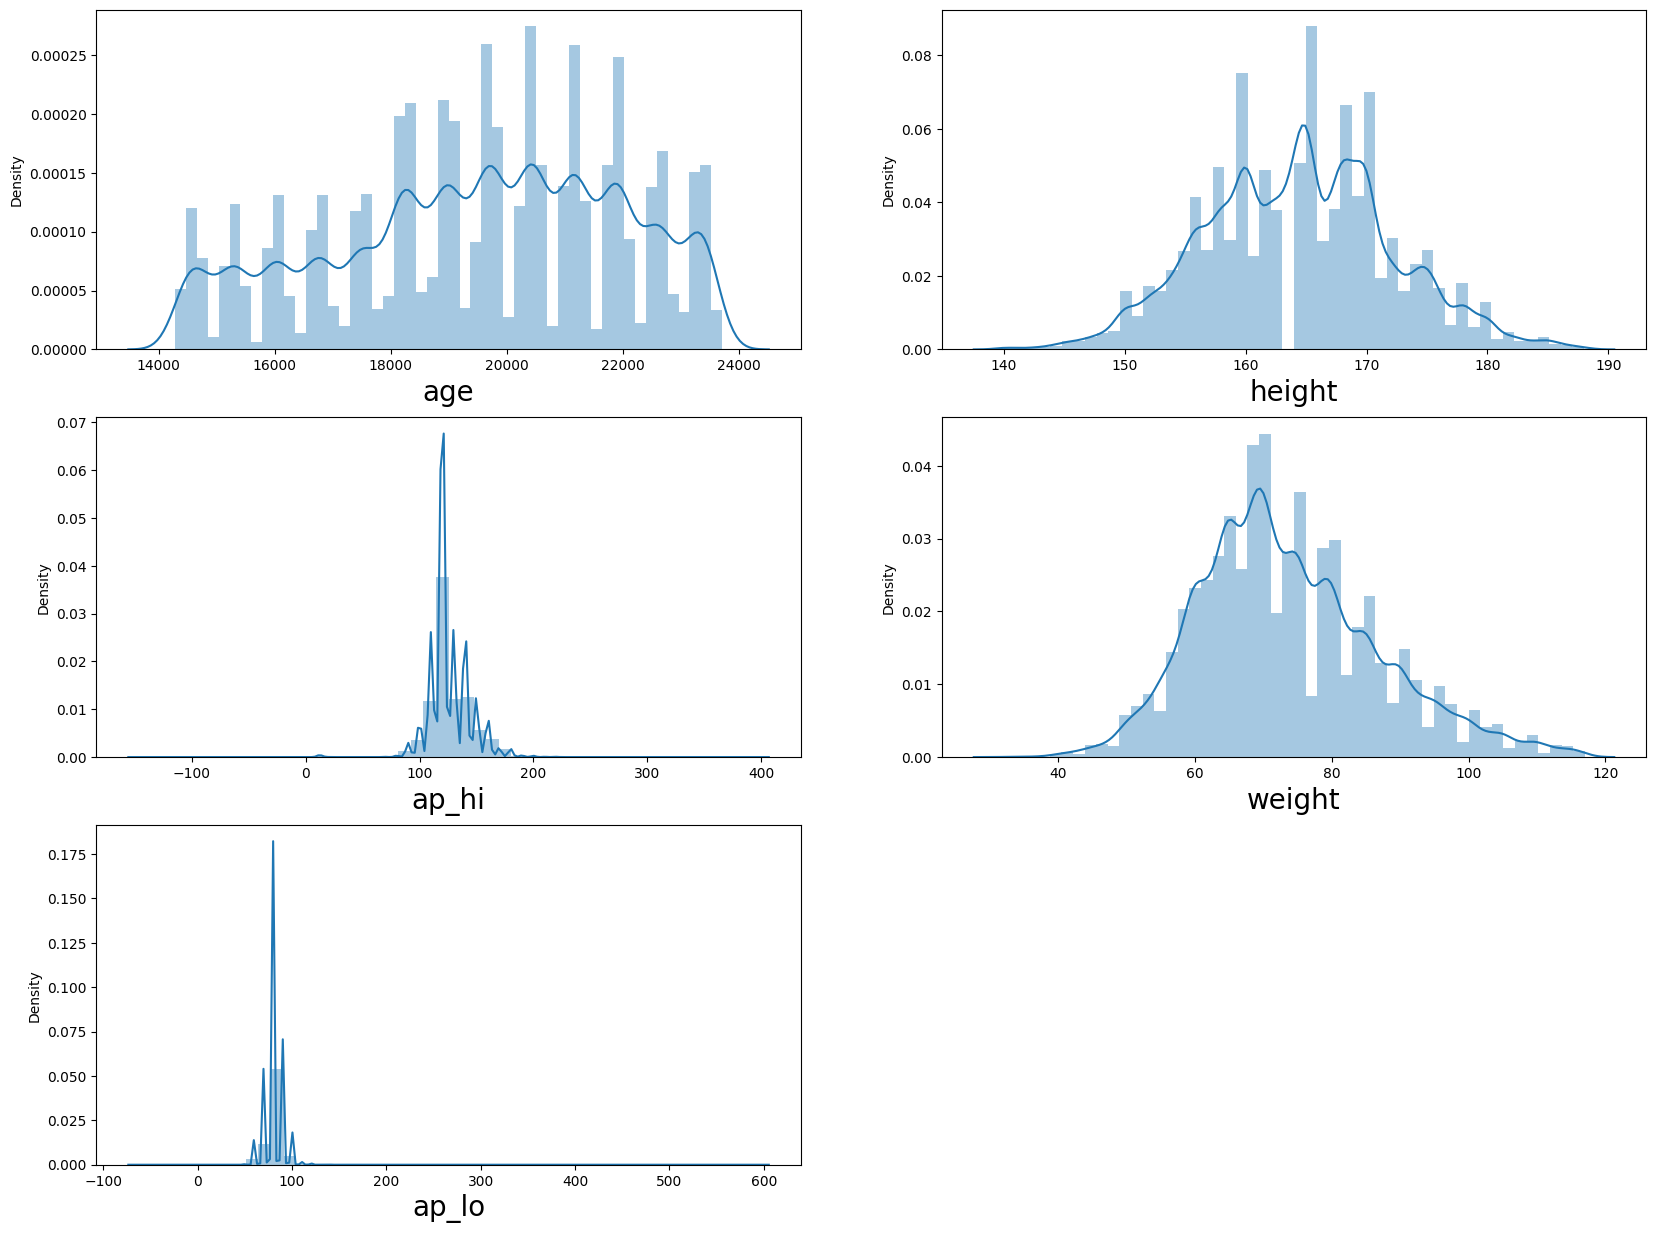

In [11]:
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber <= 6 :
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [12]:
df.shape

(67360, 12)

#### YO DO YOUR SELF FOR FEATURE SELECTION AS YOUR WISH

In [ ]:
# DO HEATMAP AND KBEST

In [13]:
X = df.drop(columns = ['cardio'],axis=1)
y = df['cardio']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=41)

In [15]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print("=======Train Result===========")
        print(f'Accuracy Score=> {accuracy_score(y_train,y_pred) *100:.2f}%')
    elif train==False:
        pred = clf.predict(x_test)
        print("=======Test Result===========")
        print(f'Accuracy Score=> {accuracy_score(y_test,pred) *100:.2f}%')
        print('\n \n Classification Report=>\n',classification_report(y_test,pred,digits=2))



In [16]:
random_clf = RandomForestClassifier()
random_clf.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
metric_score(random_clf,X_train,X_test,y_train,y_test,train = True)
metric_score(random_clf,X_train,X_test,y_train,y_test,train = False)

=======Train Result===========
Accuracy Score=> 99.98%
=======Test Result===========
Accuracy Score=> 71.44%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      8543
           1       0.72      0.70      0.71      8297

    accuracy                           0.71     16840
   macro avg       0.71      0.71      0.71     16840
weighted avg       0.71      0.71      0.71     16840



### LETS CHANGE THE TUNE

In [19]:
grid_param = {
    'n_estimators':[13,15],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_leaf':[5,6],
    'min_samples_split':[10,11],
    
}

In [20]:
grd = GridSearchCV(random_clf,param_grid=grid_param)
grd.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [21]:
random_clf = grd.best_estimator_
random_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=13)

In [22]:
metric_score(random_clf,X_train,X_test,y_train,y_test,train = True)
metric_score(random_clf,X_train,X_test,y_train,y_test,train = False)

=======Train Result===========
Accuracy Score=> 74.72%
=======Test Result===========
Accuracy Score=> 73.43%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      8543
           1       0.76      0.68      0.72      8297

    accuracy                           0.73     16840
   macro avg       0.74      0.73      0.73     16840
weighted avg       0.74      0.73      0.73     16840



## LETS PLOT ROC AUC CURVE to choose the best model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,auc

In [24]:
X = df.drop(columns = ['cardio'],axis=1)
y = df['cardio']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=52)

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()


Thresholds for LogisticRegression: [           inf 9.97918194e-01 9.93882645e-01 ... 4.40762708e-03
 4.37800559e-03 7.83781022e-05]
Thresholds for DecisionTreeClassifier: [inf 1.  0.5 0. ]
Thresholds for RandomForestClassifier: [       inf 1.         0.99       0.98       0.97       0.96
 0.95       0.94       0.93       0.92       0.915      0.91
 0.9        0.89       0.88666667 0.88       0.87       0.866
 0.86       0.85       0.84       0.8375     0.83       0.82
 0.81       0.805      0.8        0.79       0.78       0.77
 0.76488095 0.76       0.75333333 0.75       0.7425     0.74
 0.73333333 0.73       0.72       0.7175     0.71       0.7
 0.695      0.69       0.68       0.67       0.665      0.66
 0.65       0.64       0.63333333 0.63       0.62       0.61
 0.6        0.59       0.58071429 0.58       0.57666667 0.57
 0.567      0.56       0.55       0.541      0.54       0.53
 0.52       0.516      0.51       0.5        0.49       0.48
 0.47166667 0.47       0.4625     0.46  

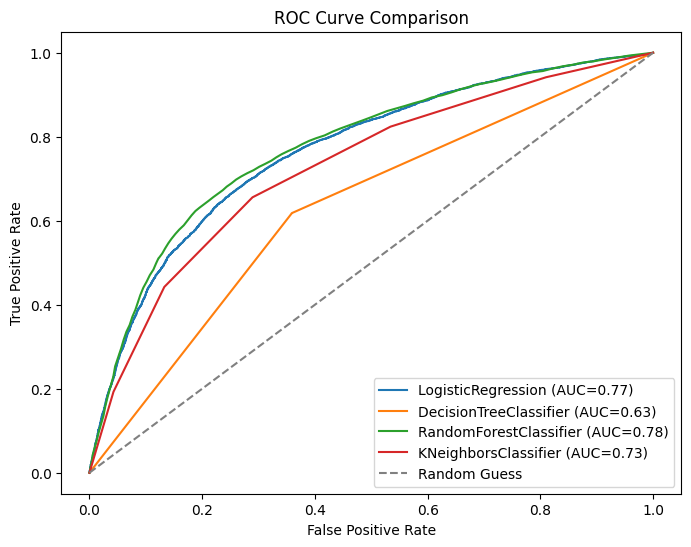

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define your models in a dictionary
models = {
    'LogisticRegression': lr,
    'DecisionTreeClassifier': dt,
    'RandomForestClassifier': rf,
    'KNeighborsClassifier': kn
}

# Create a figure for the ROC curves
plt.figure(figsize=(8, 6))

# Loop through the models dictionary
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model
    y_prob = model.predict_proba(X_test)[:, 1]  # Get the probability estimates
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # Calculate ROC curve
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    
    print(f'Thresholds for {name}: {thresholds}')  # Print thresholds
    
    plt.plot(fpr, tpr, label='{} (AUC={:.2f})'.format(name, roc_auc))  # Plot ROC curve

# Plot the diagonal line for random guess
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

# Show the plot
plt.show()
